In [131]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [132]:
# Reading data in the system
reviews_df = pd.read_csv('amazon_vfl_reviews.csv')
reviews_df.head()

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...


In [133]:
# the review column, four rows without review text, we drop the rows with the null columns
reviews_df = reviews_df.dropna()
#resetting the index
reviews_df = reviews_df.reset_index(drop=True)
# any null columns
reviews_df.isnull().sum()

asin      0
name      0
date      0
rating    0
review    0
dtype: int64

In [134]:
import re
# remove all characters not number or characters
def cleanText(input_string):
    modified_string = re.sub('[^A-Za-z0-9]+', ' ', input_string)
    return(modified_string)
reviews_df['review'] = reviews_df.review.apply(cleanText)
reviews_df['review'][150]

'I am writing this review after using it around 20 days It seems very natural and chemical free and is very gentle on skin But it does its job of cleaning the skin properly It contains tea tree which is one of my favourite ingredients for skin care Give it a try its definitely better than all other chemicals containing face washes And its even affordable as compared to other natural brands available in market '

In [135]:
reviews_df['brandName'] = reviews_df['name'].str.split('-').str[0]


In [136]:
reviews_df['brandName'] = reviews_df['brandName'].str.title()
reviews_df.brandName.unique()

array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'Dettol', 'Savlon', 'Cinthol', 'Britannia', 'Nutrichoice',
       'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack', 'Reflex',
       'Mysore'], dtype=object)

In [137]:
# Extracting the product from the name column
products = []
for value in reviews_df['name']:
    indx = len(value.split('-')[0])+1
    products.append(value[indx:])
reviews_df['product'] = products
reviews_df['product'].unique()

array(['Onion-Growth-Control-Redensyl',
       'Percent-Natural-Berry-Toothpaste',
       'Natural-Turmeric-Saffron-brightning',
       'Illuminate-Vitamin-Radiant-Turmeric',
       'Blemishes-Pigmentation-Blemish-Mulberry', 'Face-Wash-100-ml',
       'Moisturizing-Baby-Bathing-Oatmeal',
       'Protekt-Master-Blaster-Handwash', 'No-1-Bathing-Soap-Lime',
       'No-1-Bathing-Soap-Turmeric', 'Direct-Cool-Refrigerator-1905-PTDI',
       'aer-Pocket-Bathroom-Fragrance',
       'Security-Solutions-SEEC9060-Electronic',
       'Matic-Spray-Violet-Valley',
       'Security-Solutions-Goldilocks-Personal',
       'ViroShield-Disinfecting-VIROSHIELD-30UV',
       'Analog-Black-Dial-Watch-1805NM01',
       'Analog-White-Dial-Watch-NK1639SL03',
       'Karishma-Analog-Blue-Watch-1774SM01',
       'Karishma-Analog-Black-Watch-NK1639SM02',
       'Octane-Analog-Silver-Watch-NK1650BM03',
       'Analog-Black-Dial-Watch-NK1730SL02',
       'Karishma-Analog-Champagne-Watch-NK1580YL05',
       'Analog-

In [138]:
# import string
# import nltk
# from nltk.corpus import stopwords
# #converting to lower case
# reviews_df['clean_review_text']=reviews_df['review'].str.lower()
# #removing punctuations
# reviews_df['clean_review_text']=reviews_df['clean_review_text'].str.translate(str.maketrans('', '',string.punctuation))
# stopWords=stopwords.words('english')+['the', 'a','an', 'i', 'he', 'she', 'they', 'to', 'of', 'it', 'from']
# def removeStopWords(stopWords, rvw_txt):
#     newtxt = ' '.join([word for word in rvw_txt.split() if word not in stopWords])
#     return newtxt
# reviews_df['clean_review_text'] = [removeStopWords(stopWords,x) for x in reviews_df['clean_review_text']]

In [139]:
from nltk.tokenize import word_tokenize
#splitting text into words
tokenList=[]
for indx in range(len(reviews_df)):
       token=word_tokenize(reviews_df['review'] [indx])
       tokenList.append(token)
reviews_df['review_tokens'] = tokenList
reviews_df.head()

,asin,name,date,rating,review,brandName,product,review_tokens
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...,Mamaearth,Onion-Growth-Control-Redensyl,"[I, bought, this, hair, oil, after, viewing, s..."
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth,Onion-Growth-Control-Redensyl,"[Used, This, Mama, Earth, Newly, Launched, Oni..."
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product My hair falling increase too mu...,Mamaearth,Onion-Growth-Control-Redensyl,"[So, bad, product, My, hair, falling, increase..."
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...,Mamaearth,Onion-Growth-Control-Redensyl,"[Product, just, smells, similar, to, navarathn..."
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...,Mamaearth,Onion-Growth-Control-Redensyl,"[I, have, been, trying, different, onion, oil,..."


In [140]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sentiment_model = SentimentIntensityAnalyzer()
sentiment_scores=[]
sentiment_score_flag = []
for text in reviews_df['review'] :
        sentimentResults = sentiment_model.polarity_scores(text)
        sentiment_score = sentimentResults["compound"]
        #print(sentimentResults)
        #The compound value reflects the overall sentiment ranging from -1 being very negative and +1 being very positive.
        sentiment_scores.append(sentiment_score)
        # marking the sentiments as positive, negative and neutral 
        if sentimentResults['compound'] >= 0.05 : 
            sentiment_score_flag.append('positive')
  
        elif sentimentResults['compound'] <= - 0.05 : 
            sentiment_score_flag.append('negative')
  
        else : 
            sentiment_score_flag.append('neutral')
            
reviews_df['scores']=sentiment_scores
reviews_df['scoreStatus'] = sentiment_score_flag

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Laukit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [141]:
positiveReviews_df =reviews_df.loc[reviews_df['scoreStatus'] == "positive"]
negativeReviews_df =reviews_df.loc[reviews_df['scoreStatus'] == "negative"]

In [142]:
a = pd.DataFrame(positiveReviews_df.groupby(['brandName']).count()['review'])
positiveReviews_df.loc[positiveReviews_df['brandName'] == "Indiana"]["review"]
b = pd.DataFrame(negativeReviews_df.groupby(['brandName']).count()['review'])
c = pd.concat([a, b], axis=1)
c.columns = ['positiveReviews','negativeReviews']
c

,positiveReviews,negativeReviews
brandName,,
Amul,126,20.0
Britannia,84,26.0
Cinthol,168,20.0
Coca,16,4.0
Dettol,140,28.0
Fastrack,128,26.0
Glucon,14,2.0
Godrej,142,54.0
Himalaya,150,46.0


In [143]:
reviews_df.head()

,asin,name,date,rating,review,brandName,product,review_tokens,scores,scoreStatus
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...,Mamaearth,Onion-Growth-Control-Redensyl,"[I, bought, this, hair, oil, after, viewing, s...",-0.7528,negative
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...,Mamaearth,Onion-Growth-Control-Redensyl,"[Used, This, Mama, Earth, Newly, Launched, Oni...",0.8689,positive
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product My hair falling increase too mu...,Mamaearth,Onion-Growth-Control-Redensyl,"[So, bad, product, My, hair, falling, increase...",-0.7780,negative
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...,Mamaearth,Onion-Growth-Control-Redensyl,"[Product, just, smells, similar, to, navarathn...",-0.9253,negative
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...,Mamaearth,Onion-Growth-Control-Redensyl,"[I, have, been, trying, different, onion, oil,...",0.8597,positive


In [144]:
from sklearn.model_selection import train_test_split
df = pd.concat([positiveReviews_df,negativeReviews_df])
df = df[["review","scoreStatus"]]
df['scoreStatus'] = (df['scoreStatus'] == 'positive')*1
X = df["review"]
y = df["scoreStatus"]
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=10,stratify=y)

In [145]:
X

1       Used This Mama Earth Newly Launched Onion Oil ...
4       I have been trying different onion oil for my ...
5       I have been using this product for some time n...
7       It s a very good product from mamaearth The oi...
9       I used it only one time so I can t say about h...
                              ...                        
2752    This mysore sandal agarbatti we have been usin...
2753    No discount is being provided seller Informati...
2755         Not that great smell like mysore sandal soap
2762                    No return and replaceAdd more tex
2770                    No return and replaceAdd more tex
Name: review, Length: 2572, dtype: object

In [146]:
y

1       1
4       1
5       1
7       1
9       1
       ..
2752    0
2753    0
2755    0
2762    0
2770    0
Name: scoreStatus, Length: 2572, dtype: int32

In [147]:
y_train.head(4)

735     1
956     1
1105    1
2520    1
Name: scoreStatus, dtype: int32

**BERT**

In [148]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [151]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/2")

In [158]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "Nice Product", 
    "Very bad"]
)

<tf.Tensor: shape=(2, 128), dtype=float32, numpy=
array([[-0.9999987 ,  0.01071229, -0.995502  ,  0.8562559 , -0.99558413,
         0.8986226 , -0.60493124, -0.79044473,  0.15512452,  0.02966076,
        -0.26142392, -0.11665922,  0.04905817,  0.9999691 , -0.24645543,
        -0.04265916,  0.6993984 ,  0.07292873, -0.9327675 , -0.38997692,
         0.86449397,  0.06304374, -0.53457457, -0.38080534, -0.9990194 ,
        -0.01110427, -0.9924098 ,  0.97485083,  0.9883726 ,  0.07334311,
        -0.01233872, -0.09122372, -0.987129  , -0.739312  ,  0.9623693 ,
         0.99886316, -0.9929084 ,  0.09775567,  0.86410886, -0.9961791 ,
         0.80519783,  0.7134737 , -0.9991094 ,  0.96025693, -0.9958785 ,
        -0.0763339 , -0.95795584,  0.9966234 ,  0.8117529 ,  0.9986095 ,
         0.6687927 , -0.9113395 , -0.14305553,  0.98947835,  0.87842464,
         0.95031476, -0.63934624, -0.9653621 ,  0.9715774 ,  0.74336493,
         0.09228497,  0.9007104 ,  0.31535703,  0.82329303, -0.49547645,
 

In [159]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [161]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_10 (KerasLayer)    {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [162]:
len(X_train)

1800

In [163]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [164]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
57/57 [==============================] - 8s 101ms/step - loss: 0.6756 - accuracy: 0.6150 - precision: 0.8070 - recall: 0.6765
Epoch 2/10
57/57 [==============================] - 6s 104ms/step - loss: 0.4999 - accuracy: 0.7906 - precision: 0.7937 - recall: 0.9944
Epoch 3/10
57/57 [==============================] - 6s 111ms/step - loss: 0.4916 - accuracy: 0.7872 - precision: 0.7947 - recall: 0.9867
Epoch 4/10
57/57 [==============================] - 7s 114ms/step - loss: 0.4796 - accuracy: 0.7900 - precision: 0.7973 - recall: 0.9860
Epoch 5/10
57/57 [==============================] - 7s 126ms/step - loss: 0.4774 - accuracy: 0.7906 - precision: 0.7964 - recall: 0.9888
Epoch 6/10
57/57 [==============================] - 6s 106ms/step - loss: 0.4783 - accuracy: 0.7939 - precision: 0.7984 - recall: 0.9902
Epoch 7/10
57/57 [==============================] - 6s 109ms/step - loss: 0.4689 - accuracy: 0.7878 - precision: 0.7985 - recall: 0.9797
Epoch 8/10
57/57 [=======================

In [165]:
model.evaluate(X_test, y_test)

25/25 [==============================] - 3s 108ms/step - loss: 0.4478 - accuracy: 0.7979 - precision: 0.8016 - recall: 0.9902


[0.4477790892124176,
 0.7979274392127991,
 0.8015872836112976,
 0.9901960492134094]

In [166]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [167]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [168]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)
cm 

array([[ 10, 150],
       [  6, 606]], dtype=int64)

Text(33.0, 0.5, 'Truth')

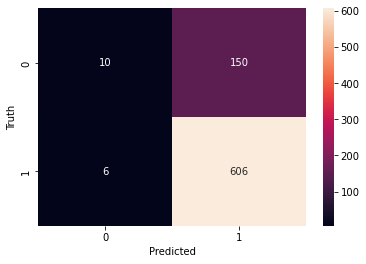

In [169]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [170]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.62      0.06      0.11       160
           1       0.80      0.99      0.89       612

    accuracy                           0.80       772
   macro avg       0.71      0.53      0.50       772
weighted avg       0.76      0.80      0.73       772



In [171]:
reviews = ["Bad"]
model.predict(reviews)

array([[0.94640154]], dtype=float32)